<a href="https://colab.research.google.com/github/CherylA24/EmotionRecognition/blob/main/EmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-- Import Necessary Library

In [ ]:
import cv2 
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

-- Make load image function

In [ ]:
def load_image(path):
    emotions_name = os.listdir(path)
    # face images
    img_list = []
    # label
    class_list = []

    for idx, emotion_name in enumerate(emotions_name):
        image_name_path = os.path.join(path,emotion_name)

        for image_name in os.listdir(image_name_path):
            image_path = os.path.join(image_name_path, image_name)
            image = cv2.imread(image_path)

            height = image.shape[0]
            width = int(image.shape[1] * (200 / height))
            image = cv2.resize(image, (width, 200))

            gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            img_list.append(gray_img)
            class_list.append(idx)
        
    return img_list, class_list

-- Make Training Model Function

In [ ]:
def train(images_list, labels_list):
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(images_list, np.array(labels_list))

    return face_recognizer

-- Make predict function

In [ ]:
def predict(recognizer, test_image_list):
    prediction_results = []
    for i in test_image_list:
      result, _ = recognizer.predict(i)
      prediction_results.append(result)

    return prediction_results

1. Load the Dataset

In [ ]:
train_path = "/content/drive/MyDrive/datasets/train"
test_path = "/content/drive/MyDrive/datasets/test"

train_faces_list, train_classes_list = load_image(train_path)
test_faces_list, test_classes_list = load_image(test_path)

2. Fit the training model into training dataset and save the model

In [ ]:
model = train(train_faces_list, train_classes_list)

3. Predict the testing dataset using the model

In [ ]:
prediction = predict(model, test_faces_list)

-- Result 

In [ ]:
# Print the data prediction and actual label
import pandas as pd

data = pd.DataFrame({
    'actual': test_classes_list,
    'prediction': prediction
})

data

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
454,6,6
455,6,6
456,6,6
457,6,6


-- Evaluation

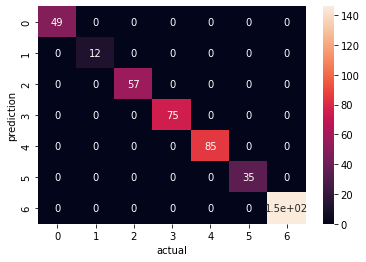

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt

confusion_matrix = pd.crosstab(data['prediction'], data['actual'], rownames=['prediction'], 
                               colnames=['actual'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(prediction, test_classes_list))
print(classification_report(prediction, test_classes_list))

[[ 49   0   0   0   0   0   0]
 [  0  12   0   0   0   0   0]
 [  0   0  57   0   0   0   0]
 [  0   0   0  75   0   0   0]
 [  0   0   0   0  85   0   0]
 [  0   0   0   0   0  35   0]
 [  0   0   0   0   0   0 146]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        75
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00       146

    accuracy                           1.00       459
   macro avg       1.00      1.00      1.00       459
weighted avg       1.00      1.00      1.00       459

